# Example Implementations of `HARK.ConsumptionSaving.ConsRiskyAssetModel`

In [1]:
from time import time

from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType
from HARK.ConsumptionSaving.ConsPortfolioModel import (
    init_portfolio,
    PortfolioConsumerType,
)
from HARK.ConsumptionSaving.ConsRiskyAssetModel import (
    RiskyAssetConsumerType,
    FixedPortfolioShareRiskyAssetConsumerType,
)
from HARK.utilities import plot_funcs_der, plot_funcs

In [2]:
mystr = lambda number: "{:.4f}".format(number)

## Idiosyncratic Income Shocks Consumer Type

In [3]:
# Make and solve an example consumer with idiosyncratic income shocks
# Sse init_portfolio parameters to compare to results of PortfolioConsumerType
IndShockExample = IndShockConsumerType(**init_portfolio)
IndShockExample.cycles = 0  # Make this type have an infinite horizon

In [4]:
start_time = time()
IndShockExample.solve()
end_time = time()
print(
    "Solving a consumer with idiosyncratic shocks took "
    + mystr(end_time - start_time)
    + " seconds."
)
IndShockExample.unpack("cFunc")

GPFRaw                 = 0.975202 
GPFNrm                 = 0.984353 
GPFAggLivPrb           = 0.955698 
Thorn = APF            = 0.984954 
PermGroFacAdj          = 1.000611 
uInvEpShkuInv          = 0.977122 
VAF                    = 0.861822 
WRPF                   = 0.523140 
DiscFacGPFNrmMax       = 0.973843 
DiscFacGPFAggLivPrbMax = 1.041223 


Solving a consumer with idiosyncratic shocks took 1.9670 seconds.


Concave consumption function:


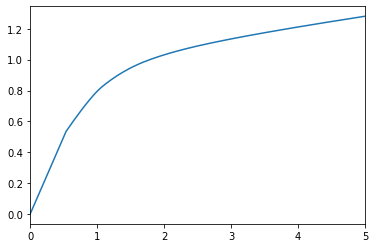

Marginal consumption function:


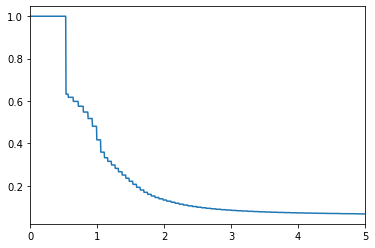

In [5]:
# Plot the consumption function and MPC for the infinite horizon consumer
print("Concave consumption function:")
plot_funcs(IndShockExample.cFunc[0], 0.0, 5.0)
print("Marginal consumption function:")
plot_funcs_der(IndShockExample.cFunc[0], 0.0, 5.0)

## Risky Return Consumer Type

In [6]:
# Make and solve an example consumer with risky returns to savings
# Use init_portfolio parameters to compare to results of PortfolioConsumerType
RiskyReturnExample = RiskyAssetConsumerType(**init_portfolio)
RiskyReturnExample.cycles = 0  # Make this type have an infinite horizon

In [7]:
start_time = time()
RiskyReturnExample.solve()
end_time = time()
print(
    "Solving a consumer with risky returns took "
    + mystr(end_time - start_time)
    + " seconds."
)
RiskyReturnExample.unpack("cFunc")

Solving a consumer with risky returns took 0.4440 seconds.


Concave consumption function:


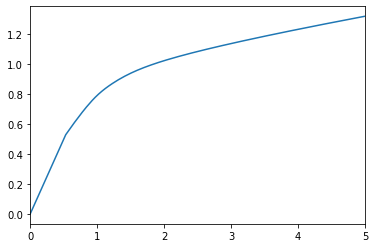

Marginal consumption function:


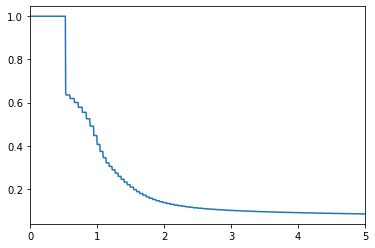

In [8]:
# Plot the consumption function and MPC for the risky asset consumer
print("Concave consumption function:")
plot_funcs(RiskyReturnExample.cFunc[0], 0.0, 5.0)
print("Marginal consumption function:")
plot_funcs_der(RiskyReturnExample.cFunc[0], 0.0, 5.0)

## Compare Idiosyncratic Income Shocks with Risky Return

Consumption functions for idiosyncratic shocks vs risky returns:


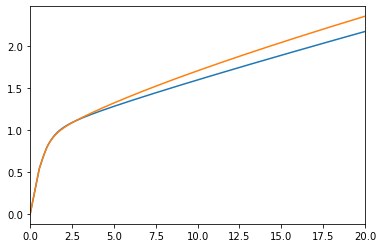

In [9]:
# Compare the consumption functions for the various agents in this notebook.
print("Consumption functions for idiosyncratic shocks vs risky returns:")
plot_funcs(
    [
        IndShockExample.cFunc[0],  # blue
        RiskyReturnExample.cFunc[0],  # orange
    ],
    0.0,
    20.0,
)

## Risky Return Consumer Type with Portfolio Choice

In [10]:
# Make and solve an example risky consumer with a portfolio choice
init_portfolio["PortfolioBool"] = True
PortfolioChoiceExample = RiskyAssetConsumerType(**init_portfolio)
PortfolioChoiceExample.cycles = 0  # Make this type have an infinite horizon

In [11]:
start_time = time()
PortfolioChoiceExample.solve()
end_time = time()
print(
    "Solving a consumer with risky returns and portfolio choice took "
    + mystr(end_time - start_time)
    + " seconds."
)
PortfolioChoiceExample.unpack("cFunc")
PortfolioChoiceExample.unpack("ShareFunc")

Solving a consumer with risky returns and portfolio choice took 0.7073 seconds.


Concave consumption function:


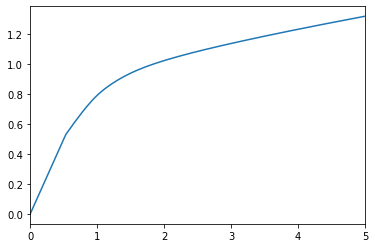

Marginal consumption function:


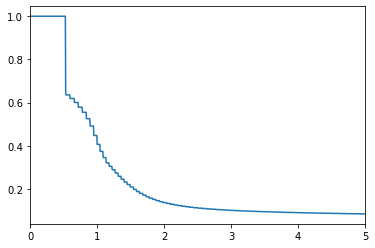

In [12]:
# Plot the consumption function and MPC for the portfolio choice consumer
print("Concave consumption function:")
plot_funcs(PortfolioChoiceExample.cFunc[0], 0.0, 5.0)
print("Marginal consumption function:")
plot_funcs_der(PortfolioChoiceExample.cFunc[0], 0.0, 5.0)

## Compare Income Shocks, Risky Return, and RR w/ Portfolio Choice

Consumption functions for idiosyncratic shocks vs risky returns vs portfolio choice:


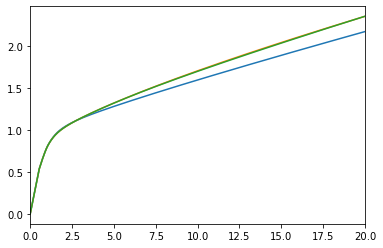

In [13]:
# Compare the consumption functions for the various agents in this notebook.
print(
    "Consumption functions for idiosyncratic shocks vs risky returns vs portfolio choice:"
)
plot_funcs(
    [
        IndShockExample.cFunc[0],  # blue
        RiskyReturnExample.cFunc[0],  # orange
        PortfolioChoiceExample.cFunc[0],  # green
    ],
    0.0,
    20.0,
)

## Portfolio Consumer Type

In [14]:
# Make and solve an example portfolio choice consumer
PortfolioTypeExample = PortfolioConsumerType()
PortfolioTypeExample.cycles = 0  # Make this type have an infinite horizon

In [15]:
start_time = time()
PortfolioTypeExample.solve()
end_time = time()
print(
    "Solving a consumer with portfolio choice took "
    + mystr(end_time - start_time)
    + " seconds."
)
PortfolioTypeExample.unpack("cFuncAdj")
PortfolioTypeExample.unpack("ShareFuncAdj")

Solving a consumer with portfolio choice took 3.1918 seconds.


Concave consumption function:


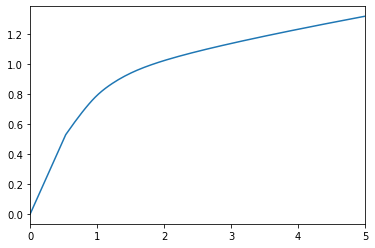

Marginal consumption function:


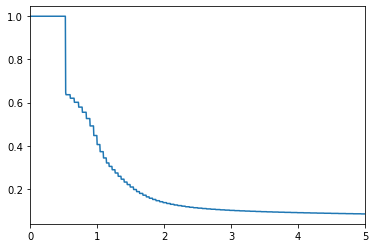

In [16]:
# Plot the consumption function and MPC for the portfolio choice consumer
print("Concave consumption function:")
plot_funcs(PortfolioTypeExample.cFuncAdj[0], 0.0, 5.0)
print("Marginal consumption function:")
plot_funcs_der(PortfolioTypeExample.cFuncAdj[0], 0.0, 5.0)

## Compare RR w/ Portfolio Choice with Portfolio Choice Type

Consumption functions for portfolio choice type vs risky asset with portfolio choice:


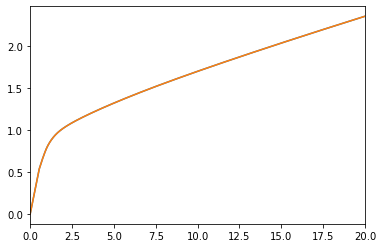

In [17]:
# Compare the consumption functions for the various portfolio choice types.
print(
    "Consumption functions for portfolio choice type vs risky asset with portfolio choice:"
)
plot_funcs(
    [
        PortfolioTypeExample.cFuncAdj[0],  # blue
        PortfolioChoiceExample.cFunc[0],  # orange
    ],
    0.0,
    20.0,
)

Share functions for portfolio choice type vs risky asset with portfolio choice:


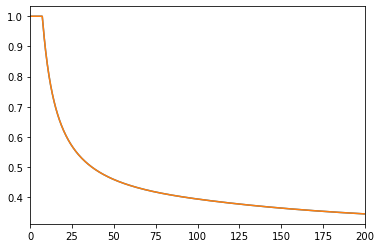

In [18]:
# Compare the share functions for the various portfolio choice types.
print("Share functions for portfolio choice type vs risky asset with portfolio choice:")
plot_funcs(
    [
        PortfolioTypeExample.ShareFuncAdj[0],  # blue
        PortfolioChoiceExample.ShareFunc[0],  # orange
    ],
    0,
    200,
)

## Risky Return Given Fixed Portfolio Share

In [19]:
FixedShareExample = FixedPortfolioShareRiskyAssetConsumerType(**init_portfolio)
FixedShareExample.cycles = 0

In [20]:
start_time = time()
FixedShareExample.solve()
end_time = time()
print(
    "Solving a consumer with fixed portfolio share took "
    + mystr(end_time - start_time)
    + " seconds."
)
FixedShareExample.unpack("cFunc")

Solving a consumer with fixed portfolio share took 6.4535 seconds.


Concave consumption function:


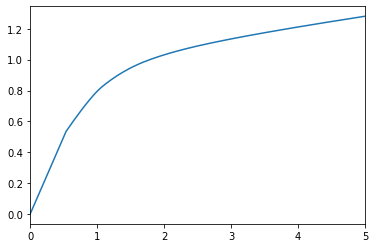

Marginal consumption function:


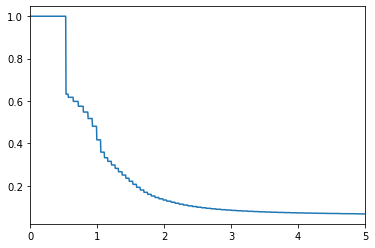

In [21]:
# Plot the consumption function and MPC for the infinite horizon consumer
print("Concave consumption function:")
plot_funcs(FixedShareExample.cFunc[0], 0.0, 5.0)
print("Marginal consumption function:")
plot_funcs_der(FixedShareExample.cFunc[0], 0.0, 5.0)

## Compare Idiosyncratic Shock Type with Fixed Share at 0.0 Type

Consumption functions for idiosyncratic shocks vs fixed share at 0.0:


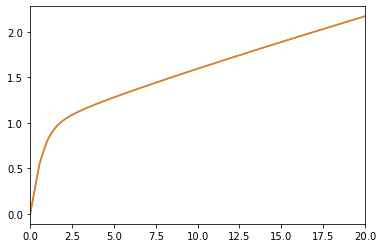

In [22]:
# Compare the consumption functions for the various idiosyncratic shocks
print("Consumption functions for idiosyncratic shocks vs fixed share at 0.0:")
plot_funcs(
    [
        IndShockExample.cFunc[0],  # blue
        FixedShareExample.cFunc[0],  # orange
    ],
    0.0,
    20.0,
)

## Fixed Share at 1.0 Type

In [23]:
init_portfolio["RiskyShareFixed"] = [1.0]
RiskyFixedExample = FixedPortfolioShareRiskyAssetConsumerType(**init_portfolio)
RiskyFixedExample.cycles = 0

In [24]:
start_time = time()
RiskyFixedExample.solve()
end_time = time()
print(
    "Solving a consumer with share fixed at 1.0 took "
    + mystr(end_time - start_time)
    + " seconds."
)
RiskyFixedExample.unpack("cFunc")

Solving a consumer with share fixed at 1.0 took 5.7542 seconds.


Concave consumption function:


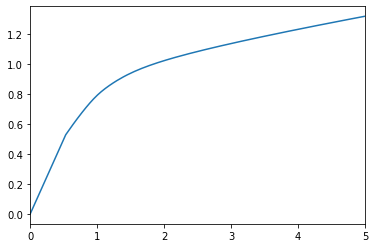

Marginal consumption function:


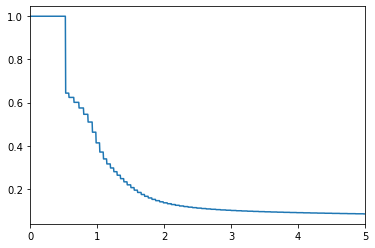

In [25]:
# Plot the consumption function and MPC for the portfolio choice consumer
print("Concave consumption function:")
plot_funcs(RiskyFixedExample.cFunc[0], 0.0, 5.0)
print("Marginal consumption function:")
plot_funcs_der(RiskyFixedExample.cFunc[0], 0.0, 5.0)

## Compare Fixed Share at 1.0 Type with Risky Return Type

Consumption functions for risky asset vs fixed share at 1.0:


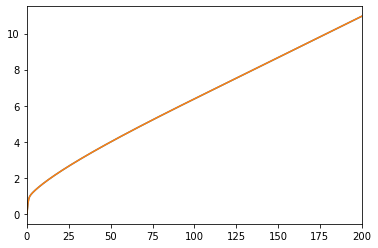

In [26]:
# Compare the consumption functions for the various risky shocks
print("Consumption functions for risky asset vs fixed share at 1.0:")
plot_funcs(
    [
        RiskyReturnExample.cFunc[0],  # blue
        RiskyFixedExample.cFunc[0],  # orange
    ],
    0.0,
    200.0,
)